In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [4]:
df = pd.read_csv('D:\Intership dataset\Advertising.csv')

In [6]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
Radio         200 non-null float64
Newspaper     200 non-null float64
Sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [9]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

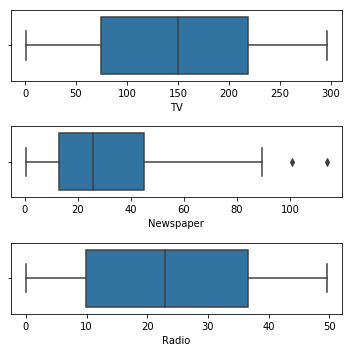

In [11]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

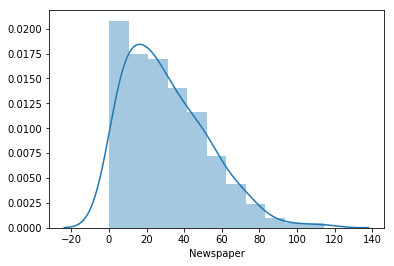

In [12]:
sns.distplot(df['Newspaper'])

In [13]:
iqr = df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)

In [14]:
lower_bridge = df["Newspaper"].quantile(0.25) - (iqr*1.5)
upper_bridge = df["Newspaper"].quantile(0.75) + (iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


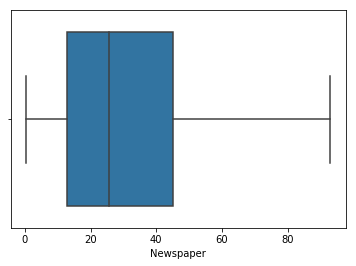

In [15]:
data = df.copy()
data.loc[data['Newspaper']>=93, 'Newspaper']=93
sns.boxplot(data['Newspaper'])


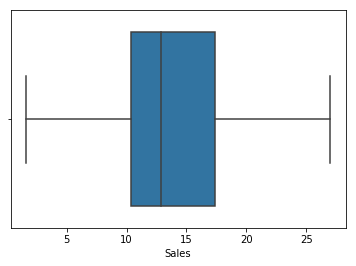

In [16]:
sns.boxplot(data['Sales']);

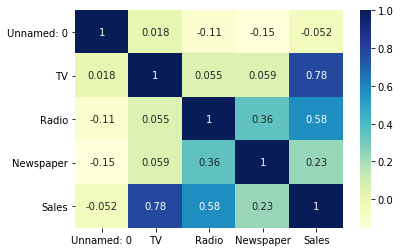

In [21]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [22]:
important_features = list(df.corr()['Sales'][(df.corr()['Sales']>+0.5)|(df.corr()['Sales']<-0.5)].index)
print(important_features)

['TV', 'Radio', 'Sales']


In [23]:
X = data['TV']
y = data['Sales']

In [24]:
X = X.values.reshape(-1,1)

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.33)

In [26]:
print(X_train.shape,y_train.shape)

(134, 1) (134,)


In [27]:
from sklearn.metrics import  mean_squared_error , r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [28]:
knn = KNeighborsRegressor().fit(X_train, y_train)
knn

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [29]:
knn_train_pred = knn.predict(X_train)

In [30]:
knn_test_pred = knn.predict(X_test)

In [31]:
print(knn_train_pred, knn_test_pred)

[16.98 21.46 17.54  9.72 11.84 13.3  17.24 17.76 12.54  6.94 13.38  9.72
 18.68 20.38 21.78  6.28 12.4  21.56 17.54 11.88  9.84 11.36  6.04 16.28
 21.44  9.84 18.3  20.7   6.28 13.36  8.26 13.92  9.76 12.38 17.26 14.34
 11.84 13.26 11.12 11.12  7.52 18.72 12.76 14.34 18.72  7.52 12.38 16.28
 15.76 13.38 21.44 13.3  14.92 12.54 11.84  9.72 14.72  9.12 11.3  12.76
 20.48 21.44 20.7  11.6  16.38 14.56 17.54 16.1  21.56 16.28 14.54  9.44
 19.94 19.34 20.38  8.26 18.16  9.84 11.32  8.26 16.62 11.12  5.88 18.72
 11.32 13.26 17.18 17.4  17.54 11.3  15.28 12.38 18.82 15.76  5.88 13.92
 14.54 17.54  7.52 16.1  13.18 15.3  12.52 17.54  7.52 17.24 11.2  11.84
  9.44  7.52 11.12 16.04 18.72 16.5  21.56  6.94 16.1  19.94 12.14 13.26
 16.1  15.76 20.68 13.26 15.34 14.62 18.82 15.24 17.54  5.88 16.16 12.54
 11.82 18.88] [11.84 14.8  11.12 20.68  9.84  9.76 12.58 15.76 20.48 20.38  5.88 11.32
 19.34 17.24 16.56 13.26  7.52 11.82 13.92 13.38 19.02 20.7  15.24 16.16
 13.3  18.16 21.44 13.38 21.78  7.52 

In [32]:
Results = pd.DataFrame(columns=["Model","Train R2","Test R2","Test RMSE","Variance"])


In [33]:
r2 = r2_score(y_test,knn_test_pred)
r2_train = r2_score(y_train,knn_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,knn_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"K-Nearest Neighbors","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)
     

R2: 0.5422435740914658
RMSE: 3.5613480593730236


In [34]:

Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.676961,0.542244,3.561348,0.134718


In [35]:

svr = SVR().fit(X_train,y_train)
svr
     

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [36]:
svr_train_pred = svr.predict(X_train)
svr_test_pred = svr.predict(X_test)

In [37]:
print(svr_train_pred,svr_test_pred)

[14.69988683 14.27776316 13.17921961 12.08940906 11.93133017 12.27430179
 13.30359322 13.00003337 12.83559154 11.14370261 11.49971174 12.27392369
 14.27462981 15.12371713 14.27464801 10.69870254 13.20054754 14.99218973
 15.27985    12.43163155 11.12930195 12.20454669 12.02816255 14.73141129
 14.88727781 11.98469217 14.5726019  14.27654137 10.57264637 12.28251797
 11.63493256 13.32023696 12.27461038 12.86289483 14.57320182 14.30037834
 11.89971175 12.34744419 12.98195539 12.06072561 11.47137334 15.41847071
 12.27423589 14.16400945 15.01334742 10.58443481 13.1655962  14.78246683
 15.2312277  11.49971174 14.27500937 12.99971174 12.31264825 12.27598325
 11.93133017 12.09009128 14.0010093  12.2746108  13.31656179 14.26668522
 14.51217389 14.88763123 14.27654137 13.90054754 12.27577026 14.26466559
 13.60652695 14.76275983 15.20645636 14.79996183 13.26847836 12.21902992
 15.38539825 14.28589562 15.52889351 12.01063131 14.42659824 11.20842225
 11.44312738 11.42505676 13.00037834 12.59971178 12

In [38]:
r2 = r2_score(y_test,svr_test_pred)
r2_train = r2_score(y_train,svr_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,svr_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"Support Vector Machine","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.10402208918953137
RMSE: 4.982483246277507


In [39]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.676961,0.542244,3.561348,0.134718
1,Support Vector Machine,0.323608,0.104022,4.982483,0.219586


In [40]:
import statsmodels.api as sm

In [41]:
X_train_constant = sm.add_constant(X_train)

In [42]:
model = sm.OLS(y_train, X_train_constant).fit()

In [43]:
model.params


const    7.157150
x1       0.047384
dtype: float64

In [44]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     217.7
Date:                Sun, 05 Feb 2023   Prob (F-statistic):           1.03e-29
Time:                        13:01:20   Log-Likelihood:                -344.64
No. Observations:                 134   AIC:                             693.3
Df Residuals:                     132   BIC:                             699.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1571      0.556     12.882      0.0

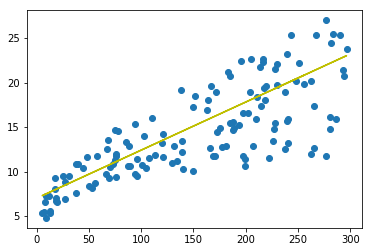

In [45]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.9955 + 0.0541 * X_train, 'y')
plt.show()

In [46]:
y_train_pred = model.predict(X_train_constant)
res = (y_train - y_train_pred)
res

48    -3.122758
188   -4.808928
131   -7.023344
182   -1.120122
117   -1.377275
90    -2.320799
21    -5.906073
43    -4.060866
88     1.558857
108   -2.477878
9     -6.024441
60    -1.592185
147    6.719100
20     0.494220
98     4.515752
5     -0.369389
161    2.082055
17     3.909038
97    -0.418422
140    0.264876
195   -1.367212
29    -0.002449
158   -0.411541
154   -0.455835
30     0.364124
190    1.771189
113   -1.188803
176    1.272704
8     -2.764651
31    -0.606785
         ...   
121   -1.047966
68     0.493927
51    -1.214487
82     0.574847
135    2.154211
119   -1.476396
65    -1.126635
40    -0.152377
124    1.668259
14     2.171809
102   -5.634102
22    -2.182616
146   -5.334010
69     4.870034
37     4.003277
105    5.508619
47     4.675467
179   -2.403914
11     0.069540
67    -0.357719
110   -4.456421
3      4.164198
175    6.722265
197   -2.744089
54     0.595115
126   -0.926744
85    -1.111708
46    -0.807480
114    3.737434
109    0.541018
Name: Sales, Length: 134

In [47]:
y_train_pred

array([17.9227582 , 20.70892798, 19.72334411,  9.82012159, 10.77727515,
       13.52079948, 18.40607336, 16.96086625, 11.34114285,  7.77787809,
       16.62444099,  9.69218522, 18.68089964, 17.50578041, 20.88424819,
        7.5693892 , 11.21794486, 20.49096232, 15.91842177, 10.63512363,
        8.96721247, 10.50244888,  7.71154072, 16.05583491, 21.03587647,
        9.02881147, 17.08880262, 18.9272956 ,  7.56465081, 12.50678531,
        8.46020539, 14.255249  ,  9.26573066, 12.89059441, 17.14092484,
       15.33086216, 10.77253677, 13.80510252, 10.39820444, 10.32712868,
        7.97215184, 17.96066527, 12.24617419, 15.27400155, 18.06017133,
        8.00532052, 12.86690249, 16.08426521, 14.89493083, 16.62444099,
       21.20171991, 13.3976015 , 15.13658842, 11.28902062, 10.77727515,
        9.88172058, 15.06077427,  8.64974075, 11.60649235, 12.40254086,
       17.27359959, 21.06904516, 19.0457552 , 12.02347014, 17.69531577,
       15.45406014, 19.74229765, 18.53400973, 20.45779363, 16.06

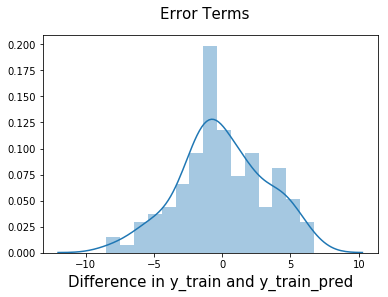

In [48]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Difference in y_train and y_train_pred', fontsize = 15)
plt.show()

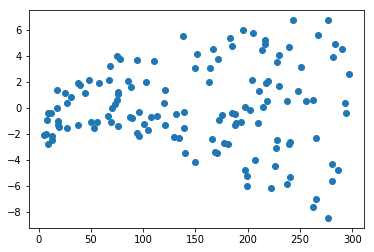

In [49]:
plt.scatter(X_train, res)
plt.show()

In [50]:
X_test_constant = sm.add_constant(X_test)
y_pred = model.predict(X_test_constant)

In [51]:
y_pred

array([10.71567616, 15.48249045, 10.43611151, 17.36362889,  8.90561348,
        9.27520743, 13.11329846, 14.95179144, 17.26886121, 17.51051879,
        7.19031848, 11.77707417, 20.62837545, 18.44398044, 16.21220158,
       13.61082878,  7.97215184, 10.95733375, 14.1367894 , 12.71053582,
       20.12610675, 18.94624914, 15.54408944, 17.77112991, 13.36917119,
       17.60528647, 20.93163203, 16.5912723 , 20.78474212,  8.08587305,
        8.34648417,  9.98122665, 18.51979458, 10.7346297 , 12.65367521,
        7.35142354, 10.10916301, 10.2892216 , 18.60982388, 14.57745911,
       18.15493901, 19.18316834, 13.56344494, 12.3598954 , 11.44064891,
       12.3598954 , 16.33539956,  9.1946549 , 17.69531577, 13.9283005 ,
       17.5958097 , 19.53854714, 16.95612787,  8.34174579,  7.95793669,
        8.51232761, 16.58179553, 13.76719545, 11.76285902, 18.26866023,
        8.28488518, 12.99010047,  7.55517405,  9.19939329, 17.14566323,
       13.85248636])

In [52]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [53]:
np.sqrt(mean_squared_error(y_test, y_pred))

3.393394801302167

In [54]:
r2 = r2_score(y_test, y_pred)
r2

0.5844011003383383

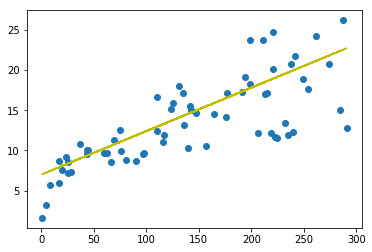

In [55]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.9955 + 0.0541 * X_test, 'y')
plt.show()